### 1) Carga del dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
from plotly.subplots import make_subplots


file = r"C:\Users\diego\OneDrive\Escritorio\proyectoDatos\DNP-proyectos_Colombia.csv"
df = pd.read_csv(file, encoding="utf-8")
df.head()

,Bpin,NombreProyecto,ObjetivoGeneral,EstadoProyecto,Horizonte,Sector,EntidadResponsable,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable,TotalBeneficiario
0,2019415240011,Desarrollo Del Programa De Transporte Escola...,Garantizar a los menores y los adolescentes d...,En Ejecución,2019-2019,Educación,PalermoHuila,"2201 CALIDAD, COBERTURA Y FORTALECIMIENTO DE L...",T,Todos por un nuevo país (2014-2018),1.000000e+09,1.000000e+09,0.000000e+00,0.000000e+00,"Inactivo (PGN, Territorio)",41524,718.0
1,2024503180038,Estudios Y Diseños Para La Construcción Del C...,Mejorar los índices de calidad de vida de la p...,En Ejecución,2024-2025,Inclusión Social Y Reconciliación,GuamalMeta,4103 INCLUSIÓN SOCIAL Y PRODUCTIVA PARA LA POB...,T,Colombia Potencia Mundial de la Vida (2022-2026),2.037023e+08,2.037023e+08,5.030591e+07,5.030591e+07,"En ejecución (PGN, Territorio)",50318,2700.0
2,2022002700139,Desarrollo De La Dimensión Vida Saludable Y En...,Mejorar las condiciones de atención y protecci...,En Ejecución,2023-2023,Salud Y Protección Social,Sucre,SALUD PÚBLICA,T,"Pacto Por Colombia, Pacto por la Equidad (2019...",3.700670e+08,3.700670e+08,1.064999e+08,1.064999e+08,"Inactivo (PGN, Territorio)",70,981727.0
3,2024735550002,Mejoramiento De Las Condiones De Acciones Y Ac...,GTYBY,Formulación,2024-2024,Educación,PlanadasTolima,"2201 CALIDAD, COBERTURA Y FORTALECIMIENTO DE L...",T,Colombia Potencia Mundial de la Vida (2022-2026),1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,Devuelto a MGA,73555,100.0
4,2024202380105,Desarrollo Y Fomento De La Cultura Local Del M...,Fortalecer la promoción de actividades artísti...,En Ejecución,2024-2024,Cultura,El CopeyCesar,3301 PROMOCIÓN Y ACCESO EFECTIVO A PROCESOS CU...,T,Colombia Potencia Mundial de la Vida (2022-2026),4.698203e+08,4.698203e+08,0.000000e+00,0.000000e+00,"Inactivo (PGN, Territorio)",20238,32624.0


### 2) Limpieza de datos

In [17]:
#Eliminacion de columnas que no agregan valor
cols_to_drop = [
    "ObjetivoGeneral",
    "ProgramaPresupuestal",
    "TipoProyecto",
    "SubEstadoProyecto",
    "CodigoEntidadResponsable"
]

df = df.drop(columns=cols_to_drop)



In [18]:
"""Este codigo se hizo para separa la columna Horizonte en dos columnas'Inicio' y 'Fin'"""
# 1) Crear 'Inicio' y 'Fin' desde 'Horizonte' y eliminar 'Horizonte' de una vez
df[['Inicio', 'Fin']] = df.pop('Horizonte').str.split('-', n=1, expand=True)

# (opcional) limpiar espacios
df['Inicio'] = df['Inicio'].str.strip()
df['Fin']    = df['Fin'].str.strip()

# 2) Mover 'Inicio' y 'Fin' para que queden justo antes de 'Sector'
sector_pos = df.columns.get_loc('Sector')
df.insert(sector_pos,     'Inicio', df.pop('Inicio'))
df.insert(sector_pos + 1, 'Fin',    df.pop('Fin'))

display(df.head())



,Bpin,NombreProyecto,EstadoProyecto,Inicio,Fin,Sector,EntidadResponsable,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,TotalBeneficiario
0,2019415240011,Desarrollo Del Programa De Transporte Escola...,En Ejecución,2019,2019,Educación,PalermoHuila,Todos por un nuevo país (2014-2018),1.000000e+09,1.000000e+09,0.000000e+00,0.000000e+00,718.0
1,2024503180038,Estudios Y Diseños Para La Construcción Del C...,En Ejecución,2024,2025,Inclusión Social Y Reconciliación,GuamalMeta,Colombia Potencia Mundial de la Vida (2022-2026),2.037023e+08,2.037023e+08,5.030591e+07,5.030591e+07,2700.0
2,2022002700139,Desarrollo De La Dimensión Vida Saludable Y En...,En Ejecución,2023,2023,Salud Y Protección Social,Sucre,"Pacto Por Colombia, Pacto por la Equidad (2019...",3.700670e+08,3.700670e+08,1.064999e+08,1.064999e+08,981727.0
3,2024735550002,Mejoramiento De Las Condiones De Acciones Y Ac...,Formulación,2024,2024,Educación,PlanadasTolima,Colombia Potencia Mundial de la Vida (2022-2026),1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,100.0
4,2024202380105,Desarrollo Y Fomento De La Cultura Local Del M...,En Ejecución,2024,2024,Cultura,El CopeyCesar,Colombia Potencia Mundial de la Vida (2022-2026),4.698203e+08,4.698203e+08,0.000000e+00,0.000000e+00,32624.0


In [19]:
""""Eliminar los duplicados Bpin y conservar los que tengan el año mas reciente"""
# Convertir a datetime y quedarnos solo con el año
df['Fin'] = pd.to_datetime(df['Fin'], errors='coerce').dt.year

# Para cada Bpin, quedarnos con la fila con el año 'Fin' más grande
df_sin_duplicados = df.sort_values('Fin').drop_duplicates(subset='Bpin', keep='last')

# Resetear índice
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)

df



,Bpin,NombreProyecto,EstadoProyecto,Inicio,Fin,Sector,EntidadResponsable,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,TotalBeneficiario
0,2019415240011,Desarrollo Del Programa De Transporte Escola...,En Ejecución,2019,2019,Educación,PalermoHuila,Todos por un nuevo país (2014-2018),1.000000e+09,1.000000e+09,0.000000e+00,0.000000e+00,718.0
1,2024503180038,Estudios Y Diseños Para La Construcción Del C...,En Ejecución,2024,2025,Inclusión Social Y Reconciliación,GuamalMeta,Colombia Potencia Mundial de la Vida (2022-2026),2.037023e+08,2.037023e+08,5.030591e+07,5.030591e+07,2700.0
2,2022002700139,Desarrollo De La Dimensión Vida Saludable Y En...,En Ejecución,2023,2023,Salud Y Protección Social,Sucre,"Pacto Por Colombia, Pacto por la Equidad (2019...",3.700670e+08,3.700670e+08,1.064999e+08,1.064999e+08,981727.0
3,2024735550002,Mejoramiento De Las Condiones De Acciones Y Ac...,Formulación,2024,2024,Educación,PlanadasTolima,Colombia Potencia Mundial de la Vida (2022-2026),1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,100.0
4,2024202380105,Desarrollo Y Fomento De La Cultura Local Del M...,En Ejecución,2024,2024,Cultura,El CopeyCesar,Colombia Potencia Mundial de la Vida (2022-2026),4.698203e+08,4.698203e+08,0.000000e+00,0.000000e+00,32624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496415,202500000008973,Fortalecimiento De Los Mecanismos Herramientas...,En Ejecución,2025,2025,Gobierno Territorial,SoracáBoyacá,Colombia Potencia Mundial de la Vida (2022-2026),7.000000e+07,7.000000e+07,3.000000e+07,3.000000e+07,6068.0
496416,2024058540026,Implementación De Procesos De Transición Agrop...,En Ejecución,2024,2025,Agricultura Y Desarrollo Rural,ValdiviaAntioquia,Colombia Potencia Mundial de la Vida (2022-2026),7.296000e+08,7.296000e+08,1.908343e+08,1.908343e+08,14722.0
496417,202500000009256,Fortalecimiento Y Fomento Deportivo Y Desarrol...,En Ejecución,2025,2025,Deporte Y Recreación,MaceoAntioquia,Colombia Potencia Mundial de la Vida (2022-2026),6.870705e+08,6.870705e+08,1.182470e+08,1.182470e+08,8707.0
496418,2024732680004,Fortalecimiento De La Autoridad Sanitaria Del ...,En Ejecución,2024,2027,Salud Y Protección Social,EspinalTolima,Colombia Potencia Mundial de la Vida (2022-2026),2.355941e+09,6.027789e+08,7.077789e+08,7.077789e+08,75257.0


In [20]:
df = df.loc[df.groupby('Bpin')['Fin'].idxmax()]

In [21]:
""""La col"""
def agrupar_estado(estado):
    if estado in ["Formulación", "Viable", "Aprobado", "No Aprobado", "Desaprobado", "No Viable"]:
        return "Planeación/Evaluación"
    elif estado == "En Ejecución":
        return "Ejecución"
    elif estado == "Terminado":
        return "Finalizado"
    else:
        return "Otro"

df["EstadoGrupo"] = df["EstadoProyecto"].apply(agrupar_estado)

# Ahora sí ver los resultados de la reclasificación
print(df["EstadoGrupo"].value_counts())


EstadoGrupo
Ejecución                255818
Planeación/Evaluación    213503
Finalizado                27027
Name: count, dtype: int64


In [22]:
""""Se elimina todas las filas del Prosperidad para Todos (2010-2014) ya que tienen muy pocos registros a comparancion de los otros planes de desarrollo """
df = df[df['PlanDesarrolloNacional'] != "Prosperidad para Todos (2010-2014)"]
df = df.reset_index(drop=True)
print(df['PlanDesarrolloNacional'].value_counts())


PlanDesarrolloNacional
Pacto Por Colombia, Pacto por la Equidad (2019-2022)    227367
Colombia Potencia Mundial de la Vida (2022-2026)        161193
Todos por un nuevo país (2014-2018)                     103196
Name: count, dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495927 entries, 0 to 495926
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Bpin                     495927 non-null  object 
 1   NombreProyecto           495927 non-null  object 
 2   EstadoProyecto           495927 non-null  object 
 3   Inicio                   495927 non-null  object 
 4   Fin                      495927 non-null  int32  
 5   Sector                   495927 non-null  object 
 6   EntidadResponsable       492556 non-null  object 
 7   PlanDesarrolloNacional   491756 non-null  object 
 8   ValorTotalProyecto       495927 non-null  float64
 9   ValorVigenteProyecto     495927 non-null  float64
 10  ValorObligacionProyecto  495927 non-null  float64
 11  ValorPagoProyecto        495927 non-null  float64
 12  TotalBeneficiario        493657 non-null  float64
 13  EstadoGrupo              495927 non-null  object 
dtypes: f

In [24]:
""" Tipado para las visualizaciones"""

# 1) Asegurar que Inicio sea año (si tu columna ya viene como 'YYYY' o 'YYYY-MM-DD')
#    - Si ya es 'YYYY' en texto:
df['Inicio'] = pd.to_numeric(df['Inicio'], errors='coerce').astype('Int16')

#    - (Alternativa) Si viene como fecha tipo 'YYYY-MM-DD':
# df['Inicio'] = pd.to_datetime(df['Inicio'], errors='coerce').dt.year.astype('Int16')

# 2) Año Fin a Int16 (nullable)
df['Fin'] = pd.to_numeric(df['Fin'], errors='coerce').astype('Int16')

# 3) Categóricas (ahorra memoria y acelera agrupaciones)
cat_cols = ['EstadoProyecto', 'Sector', 'EntidadResponsable', 'PlanDesarrolloNacional', 'EstadoGrupo']
for c in cat_cols:
    df[c] = df[c].astype('category')

# 4) Si los montos no tienen centavos y querés enteros (si no, dejá float64)
# for c in ['ValorTotalProyecto','ValorVigenteProyecto','ValorObligacionProyecto','ValorPagoProyecto','TotalBeneficiario']:
#     df[c] = pd.to_numeric(df[c], errors='coerce').round(0).astype('Int64')

# 5) (Opcional) ver ahorro de memoria
def mem_mb(x): 
    return x.memory_usage(deep=True).sum() / 1024**2

print("Memoria actual (MB):", round(mem_mb(df), 2))



Memoria actual (MB): 149.24


C:\Users\diego\AppData\Local\Temp\ipykernel_37164\2201251492.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



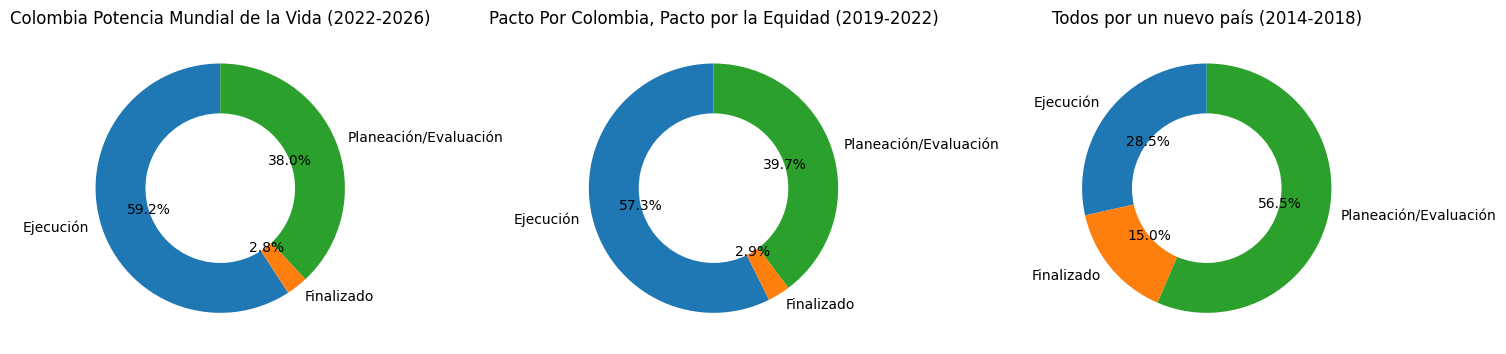

In [25]:


df_group = (df.groupby(['PlanDesarrolloNacional','EstadoGrupo'])['Bpin']
              .count()
              .reset_index()
              .rename(columns={'Bpin':'Cantidad'}))

planes = df_group['PlanDesarrolloNacional'].dropna().unique()

# Crear subplots: 1 fila, N columnas (uno por plan)
fig, axes = plt.subplots(1, len(planes), figsize=(5*len(planes), 6))

if len(planes) == 1:
    axes = [axes]  # cuando es solo un plan, axes no es lista

for ax, plan in zip(axes, planes):
    temp = df_group[df_group['PlanDesarrolloNacional'] == plan]
    wedges, texts, autotexts = ax.pie(
        temp['Cantidad'],
        labels=temp['EstadoGrupo'],
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops=dict(width=0.4)  # convierte el pastel en donut
    )
    ax.set_title(plan)

plt.tight_layout()
plt.show()


In [26]:
import plotly.express as px

# Agrupar y crear el dataframe resumido por sector
Variables_Sector = (
    df.groupby("Sector", as_index=False)
      .agg(
          ValorTotalProyecto_M=("ValorTotalProyecto", lambda x: x.sum() / 1_000_000),
          TotalBeneficiario_M=("TotalBeneficiario", lambda x: x.sum() / 1_000_000),
          CantidadProyectos=("Bpin", "count")
      )
)

# Gráfico burbuja
fig = px.scatter(
    Variables_Sector,
    x="ValorTotalProyecto_M",
    y="TotalBeneficiario_M",
    size="CantidadProyectos",
    color="Sector",
    hover_name="Sector",
    title="RELACIÓN INVERSIÓN - BENEFICIARIOS - CANTIDAD DE PROYECTOS",
    template="plotly_white",
    log_x=True,
    log_y=True,
    size_max=60
)

fig.update_xaxes(title="Inversión total (millones COP, log)")
fig.update_yaxes(title="Total beneficiarios (millones, log)")
fig.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_37164\2856748373.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Preparación ---
tabla_resumen = Variables_Sector[[
    "Sector", "ValorTotalProyecto_M", "TotalBeneficiario_M", "CantidadProyectos"
]].copy()

tabla_resumen["Eficiencia_Beneficiarios_x_Millon"] = (
    tabla_resumen["TotalBeneficiario_M"] / tabla_resumen["ValorTotalProyecto_M"]
)

# Top 5 inversión y eficiencia
top5_inv = tabla_resumen.nlargest(5, "ValorTotalProyecto_M").sort_values("ValorTotalProyecto_M", ascending=False)
top5_eff = tabla_resumen.nlargest(5, "Eficiencia_Beneficiarios_x_Millon").sort_values("Eficiencia_Beneficiarios_x_Millon", ascending=False)

# --- Crear subplots: 1 fila, 2 columnas ---
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 5 por Inversión Total (M COP)", "Top 5 por Eficiencia (beneficiarios / millón)")
)

# --- Gráfico 1: Inversión ---
fig.add_trace(
    go.Bar(
        x=top5_inv["Sector"],
        y=top5_inv["ValorTotalProyecto_M"],
        text=top5_inv["ValorTotalProyecto_M"].round(2).map(lambda v: f"{v:,.2f}"),
        textposition="outside",
        marker_color="royalblue",
        marker_line=dict(width=1, color="black"),
        name="Inversión"
    ),
    row=1, col=1
)

# --- Gráfico 2: Eficiencia ---
fig.add_trace(
    go.Bar(
        x=top5_eff["Sector"],
        y=top5_eff["Eficiencia_Beneficiarios_x_Millon"],
        text=top5_eff["Eficiencia_Beneficiarios_x_Millon"].round(6).map(lambda v: f"{v:.6f}"),
        textposition="outside",
        marker_color="tomato",
        marker_line=dict(width=1, color="black"),
        name="Eficiencia"
    ),
    row=1, col=2
)

# --- Layout ---
fig.update_layout(
    template="plotly_white",
    height=550,
    width=1200,
    showlegend=False,
    title="Top 5 Sectores: Inversión vs Eficiencia",
    margin=dict(l=60, r=40, t=80, b=150)  # margen inferior mayor para nombres largos
)

# Ejes
fig.update_yaxes(title_text="Inversión total (M COP)", row=1, col=1)
fig.update_yaxes(title_text="Eficiencia (beneficiarios / millón)", row=1, col=2)

# Rotamos nombres para que se lean bien
fig.update_xaxes(tickangle=-30)

fig.show()


In [40]:
# Conteo de proyectos por EstadoProyecto
conteo = df["EstadoGrupo"].value_counts()

# Datos
labels = conteo.index
values = conteo.values

# Crear gráfico (pastel completo, sin círculo en el centro)
fig = px.pie(
    names=labels,
    values=values,
    hole=0,  # pastel sólido
    color=labels,
    color_discrete_map={
      "Ejecución": "#B5EAEA",
      "Planeación/Evaluación": "#FFB7B2",
      "Finalizado": "#FFDAC1"
    }
)

# Personalización
fig.update_traces(
    textinfo="label+percent",
    textfont_size=14,
    pull=[0.05, 0.05, 0.1],  # separa cada sector
    marker=dict(line=dict(color="white", width=2))
)

fig.update_layout(
    title_text="DISTRIBUCIÓN DE PROYECTOS POR ESTADO",
    title_x=0.5,  # centrado
    legend_title="Estado",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [ ]:

df_finalizado = df[df["EstadoGrupo"] == "Finalizado"].copy()

df_finalizado["Eficiencia"] = np.where(
    df_finalizado["ValorTotalProyecto"] <= df_finalizado["ValorVigenteProyecto"],
    "Eficiente",
    "Sobrecosto"
)

# 2) Tipos seguros + tiempo de ejecución
df_finalizado["Inicio"] = pd.to_numeric(df_finalizado["Inicio"], errors="coerce").astype("Int64")
df_finalizado["Fin"]    = pd.to_numeric(df_finalizado["Fin"],    errors="coerce").astype("Int64")
df_finalizado["TiempoEjecucion"] = (df_finalizado["Fin"] - df_finalizado["Inicio"] + 1)

# 3) Conteo para el gráfico (con nombres claros)
conteo = (df_finalizado["Eficiencia"]
          .value_counts(dropna=False)
          .rename_axis("Eficiencia")
          .reset_index(name="Cantidad"))

# 4) Pie chart
orden = ["Eficiente", "Sobrecosto"]  # asegura el orden en leyenda
conteo["Eficiencia"] = pd.Categorical(conteo["Eficiencia"], categories=orden, ordered=True)

fig = px.pie(
    conteo.sort_values("Eficiencia"),
    names="Eficiencia",
    values="Cantidad",
    color="Eficiencia",
    color_discrete_map={"Eficiente": "#CBAACB", "Sobrecosto": "#FFD8B1"},
    title="EFICIENCIA DE PROYECTOS FINALIZADOS",
    hole=0
)

fig.update_traces(
    textinfo="label+percent",
    textfont_size=14,
    pull=[0.05]*len(conteo),  # evita error si hay 1 sola categoría
    marker=dict(line=dict(color="white", width=2))
)

fig.update_layout(
    title_x=0.5,
    legend_title="Eficiencia",
    legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5),
    template="plotly_white"
)

fig.show()
# fig.write_image("../visualizations/finalizados_eficiencia.png")


In [41]:
# 1) Clasificación por rango de tiempo
df_finalizado["RangoTiempo"] = pd.cut(
    df_finalizado["TiempoEjecucion"],
    bins=[0, 3, 10, df_finalizado["TiempoEjecucion"].max()],
    labels=["Corto (1-3)", "Medio (4-10)", "Largo (>10)"]
)

proyectos_rango = df_finalizado["RangoTiempo"].value_counts().sort_index().reset_index()
proyectos_rango.columns = ["RangoTiempo", "Cantidad"]

# 2) Colores "tiernos" (mismo concepto del pie chart, extendido a 3 categorías)
colores_tiernos_rango = {
    "Corto (1-3)": "#CBAACB",  # lavanda suave (igual que "Eficiente")
    "Medio (4-10)": "#FFD8B1", # durazno suave (igual que "Sobrecosto")
    "Largo (>10)": "#B5EAD7"   # menta suave (añadido para el tercer rango)
}

# 3) Gráfico de barras con el mismo estilo del pie
fig = px.bar(
    proyectos_rango,
    x="RangoTiempo",
    y="Cantidad",
    text="Cantidad",
    color="RangoTiempo",
    color_discrete_map=colores_tiernos_rango
)

# Etiquetas afuera, fuente 14 y borde blanco como en el pastel
fig.update_traces(
    textposition="outside",
    textfont_size=14,
    marker=dict(line=dict(color="white", width=2))
)

fig.update_layout(
    title_text="CANTIDAD DE PROYECTOS SEGÚN SU HORIZONTE DE EJECUCIÓN",
    title_x=0.5,
    xaxis_title="Rango de Tiempo",
    yaxis_title="Cantidad de Proyectos",
    legend_title="Rango de Tiempo",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    plot_bgcolor="white",   # área del gráfico
    paper_bgcolor="white"   # lienzo completo
)

fig.show()



In [42]:
import plotly.express as px

# Agrupar por sector
sector_stats = df_finalizado.groupby("Sector").agg({
    "ValorTotalProyecto": "sum",
    "TotalBeneficiario": "sum",
    "Bpin": "count"
}).rename(columns={"Bpin":"CantidadProyectos"}).reset_index()

# Scatter interactivo
fig = px.scatter(
    sector_stats,
    x="ValorTotalProyecto",
    y="TotalBeneficiario",
    size="CantidadProyectos",
    color="Sector",
    log_x=True,
    log_y=True,
    hover_data={
        "Sector": True,
        "CantidadProyectos": True,
        "ValorTotalProyecto": ":,.0f",  # formato con separador de miles
        "TotalBeneficiario": ":,.0f"
    },
    title="RELACIÓN COSTO-BENEFICIARIOS-CANTIDAD DE PROYECTO CON ESTADO FINALIZADOS"
)

# Ajustar tamaño de burbujas
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(sector_stats["CantidadProyectos"])/(100**2), line_width=1))

# Ajustar diseño
fig.update_layout(
    legend_title="Sector",
    xaxis_title="Inversión total (COP, log)",
    yaxis_title="Total beneficiarios (log)",
    width=1000,
    height=700
)

fig.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_37164\2919761945.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [43]:
top5_proyectos = df_finalizado["Sector"].value_counts().head(5)
top5_valor = (
    df_finalizado.groupby("Sector")["ValorTotalProyecto"].sum()
    .sort_values(ascending=False).head(5) / 1e12
)
top5_benef = (
    df_finalizado.groupby("Sector")["TotalBeneficiario"].sum()
    .sort_values(ascending=False).head(5) / 1e6
)

# --- Subplots ---
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Top 5 Sectores con más Proyectos",
        "Top 5 Sectores por Valor Total (Billones)",
        "Top 5 Sectores con más Beneficiarios (Millones)"
    ]
)

# 1) Proyectos
fig.add_trace(
    go.Bar(
        x=top5_proyectos.index,
        y=top5_proyectos.values,
        text=top5_proyectos.values,
        textposition="outside",
        marker_color=px.colors.sequential.Blues[4]
    ),
    row=1, col=1
)
fig.update_yaxes(range=[0, top5_proyectos.max() * 1.15], row=1, col=1)

# 2) Valor total (billones)
fig.add_trace(
    go.Bar(
        x=top5_valor.index,
        y=top5_valor.values,
        text=[f"{v:.2f}B" for v in top5_valor.values],
        textposition="outside",
        marker_color=px.colors.sequential.Greens[4]
    ),
    row=1, col=2
)
fig.update_yaxes(range=[0, top5_valor.max() * 1.15], row=1, col=2)

# 3) Beneficiarios (millones)
fig.add_trace(
    go.Bar(
        x=top5_benef.index,
        y=top5_benef.values,
        text=[f"{v:.1f}M" for v in top5_benef.values],
        textposition="outside",
        marker_color=px.colors.sequential.Blues[6]
    ),
    row=1, col=3
)
fig.update_yaxes(range=[0, top5_benef.max() * 1.15], row=1, col=3)

# --- Layout ---
fig.update_layout(
    width=1500, height=500,
    showlegend=False,
    title_text="Comparación de Sectores – Proyectos Finalizados",
    title_x=0.5
)

fig.update_xaxes(tickangle=45)

fig.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_37164\924507943.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\diego\AppData\Local\Temp\ipykernel_37164\924507943.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

